In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
from pmdarima.arima import auto_arima

In [3]:
# Convertendo os atributos que estão no formato str para o formato date (ano-mes)
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'],
                   index_col='Month', date_parser = dateparse)

In [4]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


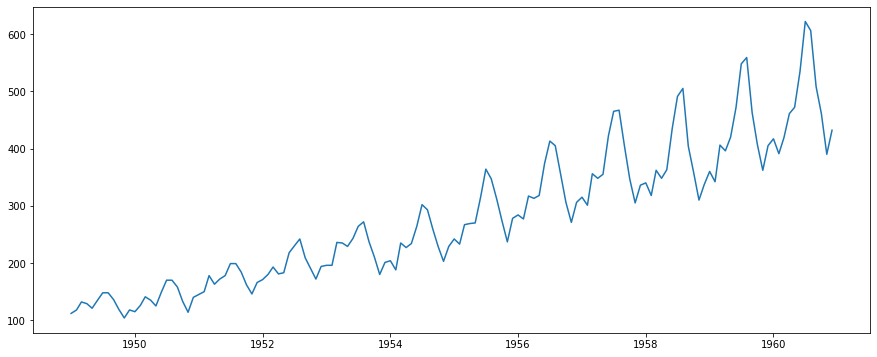

In [5]:
plt.plot(data);

In [6]:
stepwise_model = auto_arima(data, start_p=1, start_d=0, start_q=1, start_P=0, max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.15 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.43 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.11 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.21 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.29 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.18 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.06 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.15 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [7]:
print(stepwise_model.aic())

1019.1780567487391


In [13]:
train = data.loc['1949-01-01' : '1959-12-01']
test = data.loc['1960-01-01':]

In [14]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [15]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [16]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [17]:
future_forecast = stepwise_model.predict(n_periods=12)

In [18]:
future_forecast

array([421.15337299, 401.60575281, 462.08357724, 450.82671053,
       475.12436023, 529.7742754 , 605.74114145, 618.77411699,
       516.76904321, 463.57123135, 417.16898791, 458.04905577])

In [19]:
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=['#Passengers'])

<AxesSubplot:xlabel='Month'>

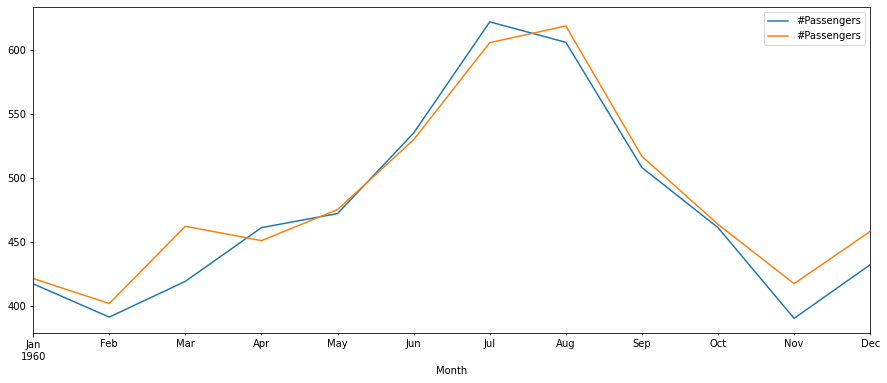

In [20]:
# azul teste, laranja forecast
pd.concat([test, future_forecast], axis=1).plot()

<AxesSubplot:xlabel='Month'>

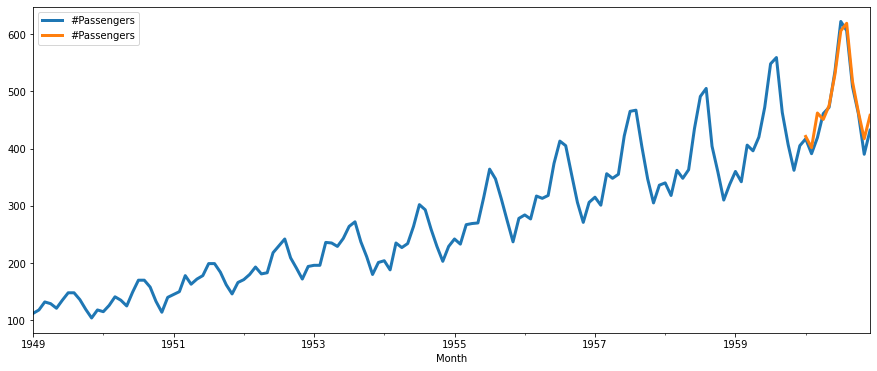

In [22]:
pd.concat([data, future_forecast], axis=1).plot(linewidth=3)